In [72]:
import pandas as pd
metro_df = pd.read_csv('Delhi-Metro-Network.csv')
metro_df

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260
...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054


In [226]:
missing_vals = metro_df.isnull().sum()
print(missing_vals)
metro_df.dtypes

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
Year                        0
Count                       0
dtype: int64


Station ID                           int64
Station Name                        object
Distance from Start (km)           float64
Line                                object
Opening Date                datetime64[ns]
Station Layout                      object
Latitude                           float64
Longitude                          float64
Year                                 int32
Count                                int64
dtype: object

## Converting Opening Date to Date time data type

In [228]:
metro_df["Opening Date"] = pd.to_datetime(metro_df["Opening Date"])
metro_df["Opening Date"].head()

0   2008-04-06
1   2018-10-31
2   2013-11-14
3   2017-12-25
4   2005-12-30
Name: Opening Date, dtype: datetime64[ns]

## Creating new column Opening Year

In [271]:
metro_df["Opening Year"] = metro_df["Opening Date"].dt.year
metro_df

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude,Year,Count,Opening Year
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390,2008,1,2008
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560,2018,1,2018
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500,2013,1,2013
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849,2017,1,2017
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260,2005,1,2005
...,...,...,...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462,2015,1,2015
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510,2006,1,2006
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120,2009,1,2009
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054,2019,1,2019


## Plotting Graph Number of stations Opened Each Year

In [366]:
metro_df["Count"] = 1
metro_stations_open_per_year = metro_df.groupby("Opening Year").count()["Count"]
metro_stations_open_per_year

Opening Year
2002     6
2003     4
2004    11
2005    28
2006     9
2008     3
2009    17
2010    54
2011    13
2013     5
2014     3
2015    13
2017    18
2018    64
2019    37
Name: Count, dtype: int64

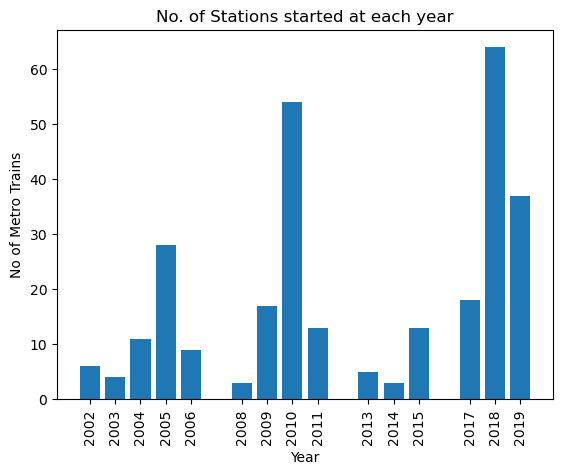

In [368]:
import matplotlib.pyplot as plt
plt.xlabel("Year")
plt.ylabel("No of Metro Trains")
plt.title("No. of Stations started at each year")
plt.bar(metro_stations_open_per_year.index , metro_stations_open_per_year.values)
plt.xticks(metro_stations_open_per_year.index , rotation = 90)
plt.show()


## Plotting Graph No of Stations Vs Different Metro Lines

In [378]:
stations_in_line = metro_df.groupby("Line").count()["Count"]
stations_in_line.reset_index()
stations_in_line

Line
Aqua line            21
Blue line            49
Blue line branch      8
Gray line             3
Green line           21
Green line branch     3
Magenta line         25
Orange line           6
Pink line            38
Rapid Metro          11
Red line             29
Voilet line          34
Yellow line          37
Name: Count, dtype: int64

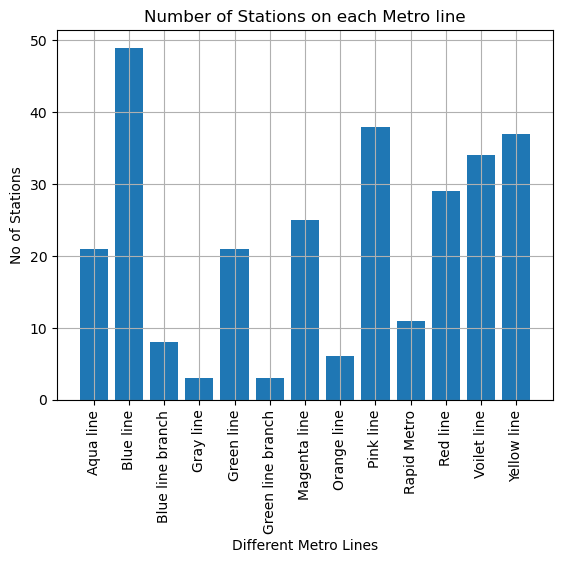

In [380]:
plt.bar(stations_in_line.index , stations_in_line.values)
plt.title("Number of Stations on each Metro line")
plt.xlabel("Different Metro Lines")
plt.ylabel("No of Stations")
plt.grid()
plt.xticks(rotation = 90)
plt.show()

In [322]:
metro_df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude,Year,Count,Opening Year
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390,2008,1,2008
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560,2018,1,2018
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500,2013,1,2013
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849,2017,1,2017
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260,2005,1,2005


## Different Types Of Metro Stations Layout 

In [358]:
station_Layout_type = metro_df["Station Layout"].value_counts()
station_Layout_type.reset_index(drop = True)
station_Layout_type

Station Layout
Elevated       214
Underground     68
At-Grade         3
Name: count, dtype: int64

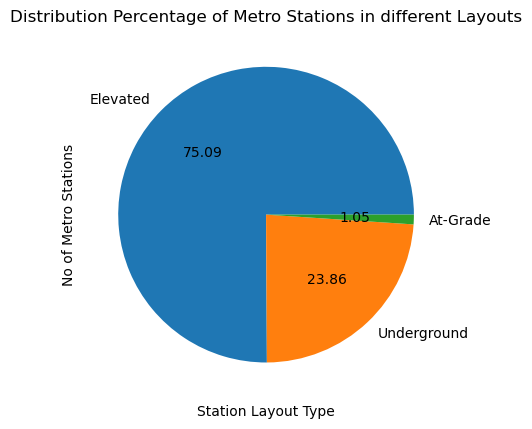

In [397]:
plt.xlabel("Station Layout Type")
plt.ylabel("No of Metro Stations")
plt.title("Distribution Percentage of Metro Stations in different Layouts")
plt.pie(station_Layout_type.values , labels = station_Layout_type.index , autopct = "%.2f" )
plt.show()